In [1]:
!pip install opencv-python-headless

Saving abc.jpg to C:\Users\Asus\OneDrive\Desktop\Picture1.jpg/abc.jpg


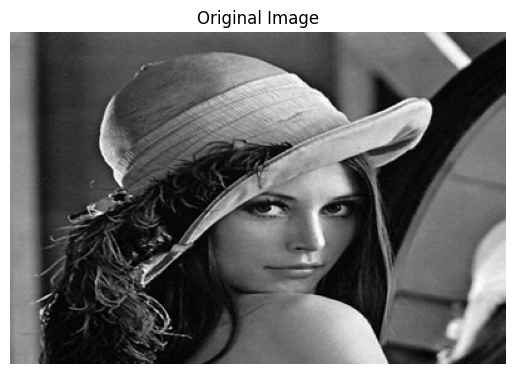

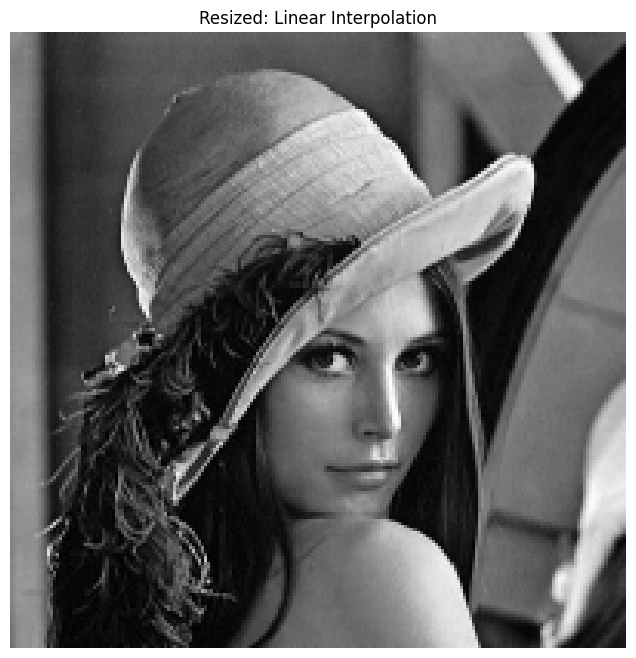

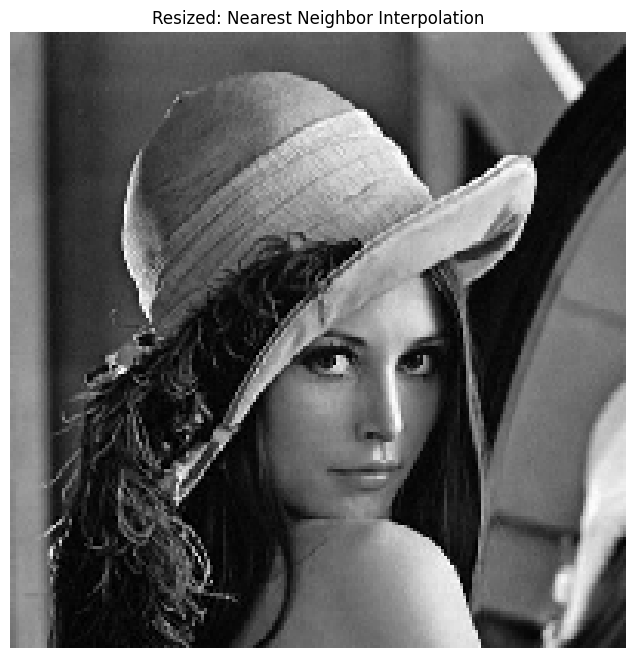

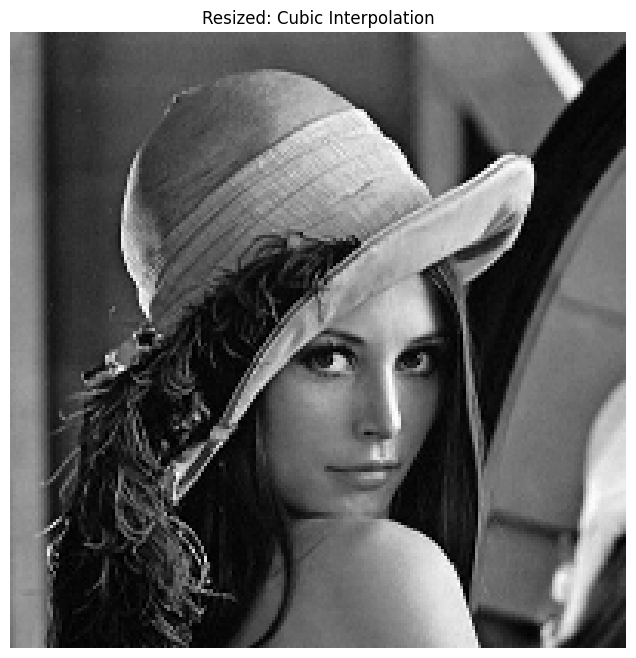

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload("C:\\Users\Asus\OneDrive\Desktop\Picture1.jpg")
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
plt.figure(figsize=(8, 8))
plt.imshow(resized_linear)
plt.title("Resized: Linear Interpolation")
plt.axis('off')
plt.show()

resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
plt.figure(figsize=(8, 8))
plt.imshow(resized_nearest)
plt.title("Resized: Nearest Neighbor Interpolation")
plt.axis('off')
plt.show()


resized_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8, 8))
plt.imshow(resized_cubic)
plt.title("Resized: Cubic Interpolation")
plt.axis('off')
plt.show()

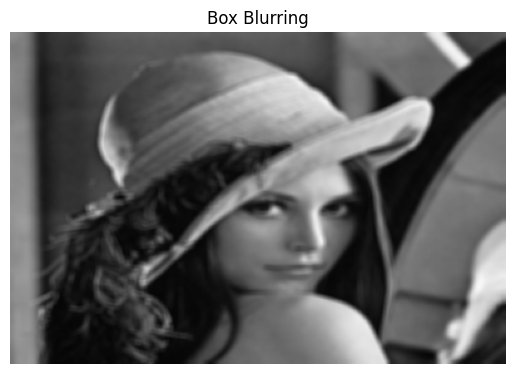

In [16]:
box_blurred = cv2.blur(image, (5, 5))
plt.imshow(box_blurred)
plt.title("Box Blurring")
plt.axis('off')
plt.show()

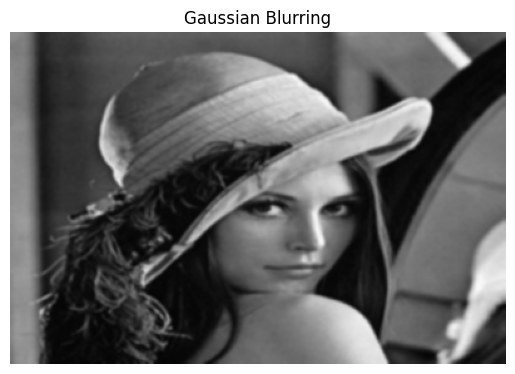

In [17]:
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(gaussian_blurred)
plt.title("Gaussian Blurring")
plt.axis('off')
plt.show()

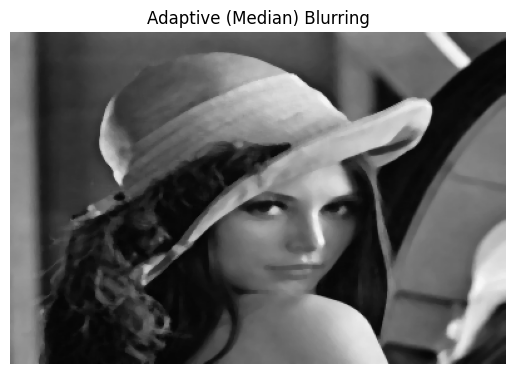

In [18]:
median_blurred = cv2.medianBlur(image, 5)
plt.imshow(median_blurred)
plt.title("Adaptive (Median) Blurring")
plt.axis('off')
plt.show()

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
X = digits.data  # Features
y = digits.target  # Labels

# Binarize the labels for ROC and AUC
y_binarized = label_binarize(y, classes=list(range(10)))

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the test set labels
y_test_binarized = label_binarize(y_test, classes=list(range(10)))

# Initialize models
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Predicted probabilities
y_proba_rf = rf_model.predict_proba(X_test)
y_proba_svm = svm_model.decision_function(X_test)


In [9]:
# Random Forest Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# SVM Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}")
print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}")


Random Forest - Accuracy: 0.9722222222222222, Precision: 0.9725507204287926, Recall: 0.9722222222222222, F1-Score: 0.9722290797927471
SVM - Accuracy: 0.9777777777777777, Precision: 0.9778736953613801, Recall: 0.9777777777777777, F1-Score: 0.9776863807154582


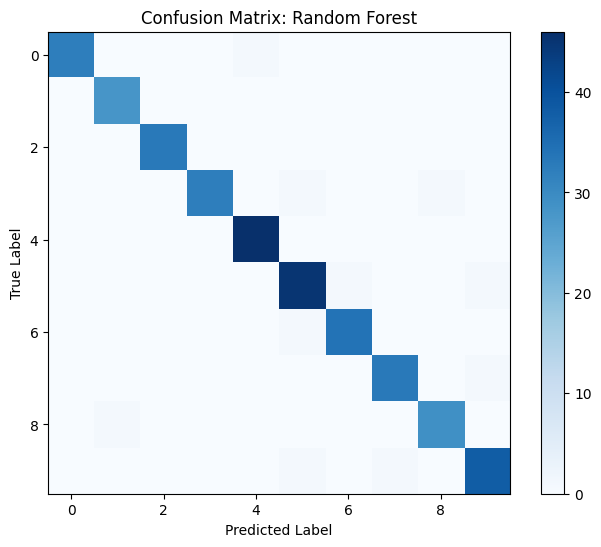

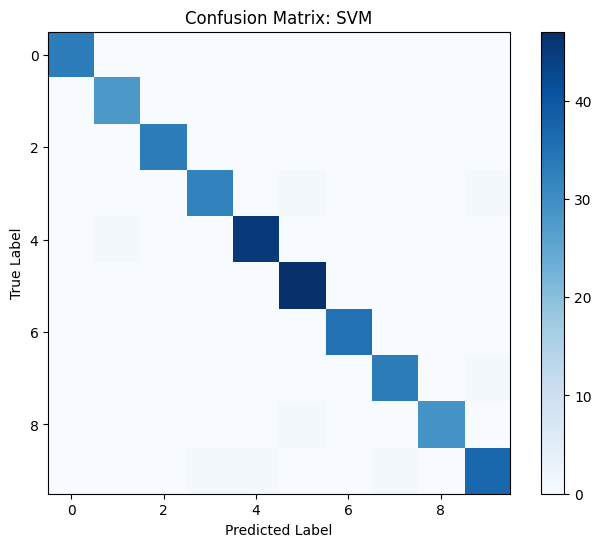

In [10]:
# Confusion Matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_rf, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix: Random Forest")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix: SVM")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


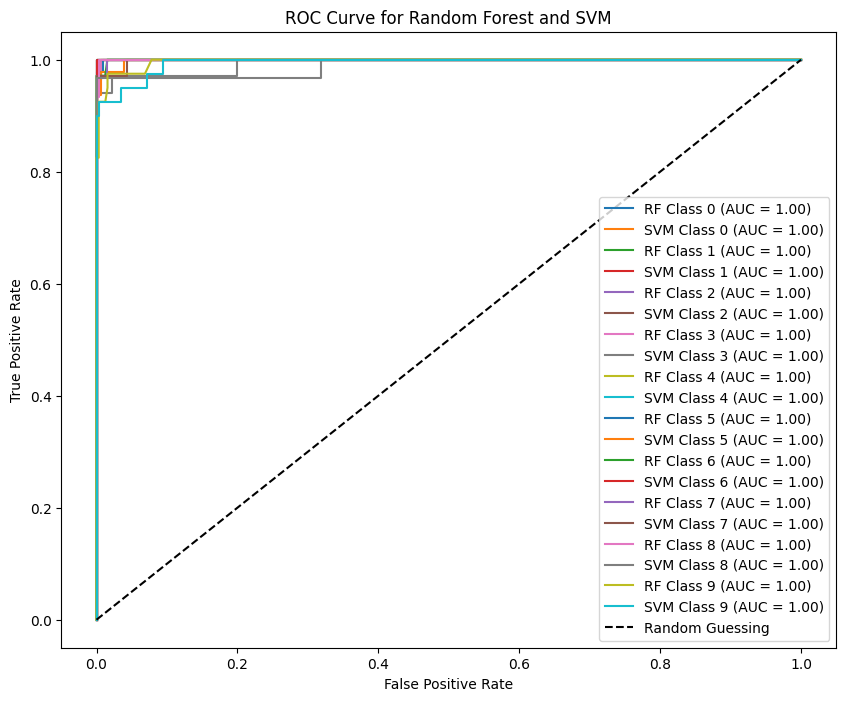

Random Forest AUC: 0.9995322668311306
SVM AUC: 0.9975469261092649


In [11]:
# Random Forest ROC-AUC
roc_auc_rf = roc_auc_score(y_test_binarized, y_proba_rf, multi_class='ovr')

# SVM ROC-AUC
roc_auc_svm = roc_auc_score(y_test_binarized, y_proba_svm, multi_class='ovr')

# Compute ROC Curves for Random Forest
fpr_rf, tpr_rf = {}, {}
for i in range(10):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_proba_rf[:, i])

# Compute ROC Curves for SVM
fpr_svm, tpr_svm = {}, {}
for i in range(10):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized[:, i], y_proba_svm[:, i])

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f"RF Class {i} (AUC = {roc_auc_rf:.2f})")
    plt.plot(fpr_svm[i], tpr_svm[i], label=f"SVM Class {i} (AUC = {roc_auc_svm:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest and SVM")
plt.legend()
plt.show()

print(f"Random Forest AUC: {roc_auc_rf}")
print(f"SVM AUC: {roc_auc_svm}")
